# i. Introduction

--------------------------------------------------------------------
**FINAL PROJECT**

**Nama Anggota**  :  
1. Achmad Raihan  
2. Handwitanto Abraham
3. Serina Roihaanah Mulawati
4. Stanly Sukmajaya Kwok

**Batch : RMT-036**
**GROUP 2** 

Program ini dibuat untuk mengetahui bagaimana sentimen masyarakat terhadap produk _Smartphone_ yang sudah ada dan akan segera rilis.

--------------------------------------------------------------------


# ii. Problem Background

### ii. a. Prologue

Program ini dibuat untuk membantu masyarakat dalam memilih smartphone dengan memanfaatkan analisis sentimen netizen di platform YouTube. Aplikasi ini dirancang untuk menganalisis sentimen komentar menggunakan teknik NLP (Natural Language Processing) berbasis Machine Learning atau Deep Learning.

Proses dimulai dengan pengumpulan data melalui scraping komentar pada video YouTube yang relevan dengan produk smartphone tertentu. Data tersebut akan dianalisis untuk mengidentifikasi sentimen positif, negatif, atau netral. Hasil analisis ini, beserta visualisasi berupa word cloud, akan memberikan informasi yang berguna bagi pengguna untuk memahami opini publik terhadap produk tersebut.

Aplikasi ini bertujuan untuk memberikan rekomendasi berbasis data yang membantu masyarakat dalam pengambilan keputusan pembelian smartphone. Selain itu, aplikasi ini juga memberikan wawasan tambahan dari analisis eksploratif (EDA) yang dapat digunakan untuk memahami tren opini publik secara lebih luas. Dengan pendekatan ini, diharapkan pengguna dapat mengambil keputusan yang lebih informatif, efisien, dan tepat sasaran.

### ii. b. Business Understanding

Untuk mengidentifikasi kasus yang dimiliki, maka dirancang **SMART Framework** dengan rincian sebagai berikut:

- **SPECIFIC**:  
  Berfokus pada pembuatan aplikasi untuk memudahkan masyarakat dalam memilih smartphone berdasarkan analisis sentimen netizen terhadap produk di platform YouTube.

- **MEASURABLE**:  
  Aplikasi harus mampu menganalisis sentimen dengan akurasi minimal 80% berdasarkan dataset pengujian.

- **ACHIEVABLE**:  
  Data akan diambil melalui scraping komentar pada video YouTube, kemudian diproses untuk menghasilkan analisis sentimen (positif, negatif, netral). Aplikasi juga akan menampilkan visualisasi berupa word cloud dari komentar yang dianalisis.  

- **RELEVANT**:  
  Dengan menyediakan informasi sentimen netizen, aplikasi ini akan membantu masyarakat dalam pengambilan keputusan yang lebih tepat saat membeli smartphone. Hal ini dapat meningkatkan kepercayaan pengguna terhadap produk tertentu dan menghemat waktu mereka dalam menentukan keputusan untuk membeli smartphone.  

- **TIME-BOUND**:  
  Proyek ini akan selesai dalam waktu satu minggu, termasuk pengumpulan data, pengolahan data, pengembangan model, pengujian, dan implementasi aplikasi.  

**PROBLEM STATEMENT**  
Target yang ingin dicapai adalah memberikan kemudahan bagi masyarakat dalam memilih smartphone dengan memanfaatkan opini dan sentimen netizen di YouTube. Aplikasi ini akan mengidentifikasi sentimen positif, negatif, dan netral pada komentar terkait, sehingga pengguna dapat memperoleh gambaran umum tentang pendapat publik terhadap produk tertentu.

**Objective:**  
Proyek ini bertujuan untuk:  
1. Mengembangkan aplikasi yang dapat menganalisis sentimen komentar pada video YouTube menggunakan model Machine Learning/Deep Learning berbasis NLP.  
2. Mempermudah pengguna dalam memahami opini publik dengan menampilkan hasil analisis berupa sentimen utama dan word cloud.  
3. Memberikan rekomendasi yang informatif dan berbasis data untuk membantu pengambilan keputusan pembelian smartphone.

### ii. c. Breaking Down the Problem

**Masalah utama:** `Menganalisis sentimen netizen untuk membantu masyarakat dalam memilih smartphone berdasarkan opini publik di YouTube`  

Untuk memudahkan analisis dan menyelesaikan masalah, kita perlu memahami detail tentang masalah tersebut.  

- Apakah terdapat pola tertentu dalam sentimen netizen (positif, negatif, atau netral) yang dapat memberikan gambaran tentang keunggulan atau kekurangan smartphone tertentu?  

- Fitur apa saja dalam teks komentar, seperti frekuensi kata, konteks kalimat, atau emosi tertentu, yang paling mempengaruhi analisis sentimen terhadap sebuah produk?  

- Apa rekomendasi yang dapat diberikan kepada masyarakat berdasarkan hasil analisis sentimen dan visualisasi (misalnya, word cloud) untuk membantu mereka membuat keputusan pembelian yang lebih baik?  

# iii. Import Libraries

Bagian ini berfungsi untuk menyimpan library yang akan digunakan dalam mengeksekusi sintaks.

In [1]:
import pandas as pd # For data manipulation using DataFrames.
import numpy as np  # For numerical operations and array handling.
import seaborn as sns
import matplotlib.pyplot as plt
import re
import tensorflow as tf

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter

import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from imblearn.over_sampling import RandomOverSampler

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\handw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\handw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


-------------------

# iv. Data Loading

Bagian ini berfungsi untuk melakukan loading data yang akan digunakan dalam analisa. Dalam proyek ini, terdapat dua dataset yang akan digunakan yaitu dataset utama dan dataset pendukung. Dataset utama berisi data yang akan digunakan dalam membangun model, sedangkan dataset pendukung akan digunakan untuk deployment aplikasi yang memberikan informasi mengenai spesifikasi dari smartphone.

## iv.a. Main Dataset

In [2]:
#Load Dataset
df_ori = pd.read_csv('final_dataset.csv')

#duplicate
df = df_ori.copy()

Setelah data di load, berikut adalah tampilan data untuk 10 baris teratas.

In [3]:
df.sample(n=20).head(10)

,author,comment,sentiment,timestamp,like_count,tipe_produk,brand,segment,release_date
244,@kidssong6833,"""ok""",Neutral,2024-09-26T04:11:25Z,0,ASUS Zenfone 11 Ultra,ASUS,Flagship,2024
141,@nephyputera8054,Ko gw merinding yah lihat kamera bekakangnya ð®,Negative,2024-03-21T07:06:01Z,0,Realme 12 5G,Realme,Mid-Range,24-Feb
1430,@cremichannel756,Kasihan rakyat Indonesia beli iphone harus ke ...,Negative,2024-11-15T11:07:35Z,0,iPhone 16,Apple,Flagship,24-Oct
2283,@middleclassyt1295,"Sial bro, itu gila",Negative,2024-09-17T05:33:14Z,0,Galaxy S25,Samsung,Flagship,5-Jan-25
1583,@AndraDefarianRoblox,selera saya scra kseluruhan di antara 3 itu ad...,Negative,2024-07-25T02:50:17Z,0,Huawei Pura 70 Ultra,Huawei,Flagship,18-Apr-24
2714,@MaddoxxFD,"modelnya cakep, mirip dgn htc yg pertama pake ...",Positive,2024-08-16T08:00:53Z,1,Sharp Aquos Sense 8,Sharp,Mid-Range,24-Jan
3245,@ITRanger,Kecil-kecil cabe rawet. Semakin keren desain l...,Positive,2024-03-13T03:40:16Z,10,Galaxy S24,Samsung,Flagship,18-Jan-24
3251,@NickDrinksWater,"Saya lebih suka ponsel ukuran biasa, dengan ba...",Negative,2024-11-04T00:57:14Z,10,Galaxy S25 Slim,Samsung,Flagship,Mid-2025
2421,@aichi13,Alhamdulillah udh kebeli hpnya,Positive,2024-10-29T08:16:25Z,0,Xiaomi 14T,Xiaomi,Flagship,24-Sep
1047,@mohammadsayuti5686,Realme paling recommended yang apa kak ?,Neutral,2024-10-02T04:32:34Z,0,Realme C61,Realme,Entry-Level,24-Sep


Berikut adalah 10 data terakhir dari dataset.

In [4]:
df.sample(n=10).tail(10)

,author,comment,sentiment,timestamp,like_count,tipe_produk,brand,segment,release_date
2567,@FaktaItuPahit,SI KECIL PANAS ð¥ WKAKAKAA...,Negative,2024-02-20T05:41:53Z,1,Galaxy S24,Samsung,Flagship,18-Jan-24
489,@ree.antika,Knp yaa kalu harga udah belasan juta saya mala...,Negative,2024-07-24T08:51:45Z,0,Vivo X100 Pro,Vivo,Flagship,2024
3172,@vkAwesomee,Tidak suka layar melengkung.,Negative,2024-09-27T08:15:25Z,4,Redmi Note 14 Series,Xiaomi,Mid-Range,2025
1265,@sitinurazizah5589,Saya kerja di Jepang kalo beli HP google pixel...,Neutral,2024-10-14T11:29:28Z,0,Google Pixel 9,Google,Flagship,2024
1715,@MrJaffacakes1234,Awalnya saya pikir itu Samsung ??,Neutral,2024-10-31T15:25:36Z,0,iPhone 17,Apple,Flagship,9-Sep-25
1029,@mailmarzuki-zs6vo,Realme c53 yg tahan banting malah downrade pen...,Negative,2024-10-01T07:59:40Z,0,Realme C61,Realme,Entry-Level,24-Sep
100,@omnick69,Bagus untuk mobile banking ini. Data2 aman.,Positive,2024-10-26T09:33:09Z,0,Galaxy A06,Samsung,Entry-Level,24-Nov
3038,@renrenmardiana8799,"Menurut ku realme mahal chipset gajelas, menur...",Negative,2024-08-09T22:33:15Z,2,Realme 13 Series,Realme,Mid-Range,2025
1927,@ferrarijunior21,Desain infinix seri note,Neutral,2024-11-14T10:09:49Z,0,Xiaomi 15 Pro,Xiaomi,Flagship,2025
3206,@EMbul888,"""Buat kaum yang mndang mnding dan cuma cari yg...",Positive,2024-05-30T00:26:51Z,6,Sharp Aquos Sense 8,Sharp,Mid-Range,24-Jan


## iv.b. Complementary Dataset

In [5]:
#Load Dataset
df_ori_spec = pd.read_csv('spesifikasi_dataset.csv', sep=';')

#duplicate
df_spec = df_ori_spec.copy()

In [6]:
df_spec.head()

,model,merek,segmen,bulan_rilis,tahun_rilis,range_harga,ram,storage,os,cpu,baterai,warna_tersedia,kamera_depan,kamera_belakang,ukuran_layar,dimensi
0,Galaxy S24,Samsung,Flagship,Januari,2024,Rp 12.000.000 - Rp 14.000.000,8 GB,128GB / 256GB,Android 14,Snapdragon 8 Gen 3,4.000 mAh,"Onyx Black, Marble Grey, Cobalt Violet, Amber ...",12 MP,50 MP + 10 MP (telefoto) + 12 MP,"6,1 inci","147,9 x 70,6 x 7,6 mm"
1,Galaxy S24+,Samsung,Flagship,Januari,2024,Rp 14.000.000 - Rp 16.000.000,8 GB,128GB / 256GB,Android 14,Snapdragon 8 Gen 3,4.900 mAh,"Onyx Black, Marble Grey, Cobalt Violet, Amber ...",12 MP,50 MP + 10 MP (telefoto) + 12 MP,"6,6 inci","158,5 x 75,9 x 7,7 mm"
2,Galaxy S24 Ultra,Samsung,Flagship,Januari,2024,Rp 18.000.000 - Rp 20.000.000,12 GB,256GB / 512GB,Android 14,Snapdragon 8 Gen 3,5.000 mAh,"Titanium Black, Titanium Gray, Titanium Violet...",12 MP,200 MP + 12 MP (ultrawide) + 10 MP (telefoto) ...,"6,8 inci","163,4 x 78,1 x 8,9 mm"
3,Galaxy A06,Samsung,Entry-Level,September,2024,Rp 2.000.000 - Rp 2.500.000,4 GB,64GB / 128GB,Android 14,Exynos 850,5.000 mAh,"Hitam, Biru, Merah",5 MP,13 MP + 2 MP,"6,5 inci","164,0 x 75,9 x 9,1 mm"
4,Realme 12 5G,Realme,Mid-Range,Oktober,2024,Rp 3.500.000 - Rp 4.000.000,8 GB,128GB / 256GB,Android 14,MediaTek Dimensity 6100+ 5G,5.000 mAh,"Biru, Hitam",16 MP,50 MP + 2 MP,"6,72 inci","165,5 x 76,0 x 8,1 mm"


In [7]:
df_spec.tail()

,model,merek,segmen,bulan_rilis,tahun_rilis,range_harga,ram,storage,os,cpu,baterai,warna_tersedia,kamera_depan,kamera_belakang,ukuran_layar,dimensi
36,Xiaomi 15 Pro,Xiaomi,Flagship,Oktober,2025,Rp 12.000.000 - Rp 14.000.000,12 GB,512 GB,MIUI 15 (berbasis Android 14),Snapdragon 8 Gen 3,5.100 mAh,"Hitam, Putih, Biru",32 MP,200 MP + 12 MP + 10,"6,73 inci",161.3 x 75.3 x 8.4 mm
37,Redmi Note 14 Series,Xiaomi,Mid-Range,-,2025,Rp 2.500.000 - Rp 5.000.000,"6 GB, 8 GB, 12 GB","128 GB, 256 GB, 512 GB",MIUI 15 (berbasis Android 14),MediaTek Dimensity 7025-Ultra / Dimensity 7300...,5.000 mAh - 5.500 mAh,"Hitam, Putih, Biru",16 MP,50 MP + 8 MP + 2 MP / 108 MP + 12 MP + 5 MP,"6,67 inci","165,3 x 76,2 x 8,0 mm"
38,Realme 13 Series,Realme,Mid-Range,-,2025,Rp 3.000.000 - Rp 5.500.000,"6 GB, 8 GB, 12 GB","128 GB, 256 GB, 512 GB",Realme UI 5.0 (berbasis Android 14),MediaTek Dimensity 7200 / Dimensity 8000 / Dim...,5.000 mAh,"Hitam, Biru, Hijau",16 MP,64 MP + 8 MP + 2 MP / 108 MP + 8 MP + 2 MP / 2...,"6,5 inci - 6,7 inci","162,5 x 74,8 x 8,1 mm - 163,9 x 75,8 x 8,2 mm"
39,OPPO Find X7,OPPO,Flagship,-,2025,Rp 12.000.000 - Rp 14.000.000,12 GB,"256 GB, 512 GB",ColorOS 14 (berbasis Android 14),Snapdragon 8 Gen 3,4.800 mAh,"Hitam, Putih, Biru",32 MP,50 MP + 50 MP + 13 MP,"6,8 inci","164,8 x 74,2 x 8,0 mm"
40,Huawei Pura 80 Ultra,Huawei,Mid-Range,April,2025,Rp 8.000.000 - Rp 9.000.000,12 GB,"256 GB, 512 GB",HarmonyOS 4.0,Kirin 9000,5.000 mAh,"Hitam, Putih, Biru",32 MP,200 MP + 12 MP + 8 MP,"6,8 inci","163,9 x 76,2 x 8,1 mm"


-------------------

# v. Exploratory Data Analysis

Dalam bagian ini akan mencakup dua hal, yaitu pemeriksaan karakteristik data dan deskripsi data secara statistik. EDA akan dilakukan terhadap dua dataset yaitu dataset utama dan dataset pendukung.

## MAIN DATASET

### v.a. Data Characteristic

Pada bagian ini akan dilakukan validasi data untuk memastikan bahwa data sesuai dengan aturan, format, atau standar tertentu dengan melakukan cek data duplikat, missing value, serta tipe data yang sesuai.

#### v.a.1. Data Type Checking

Pada bagian ini akan dilakukan pemeriksaan terhadap tipe data setiap kolom.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        3322 non-null   object
 1   comment       3322 non-null   object
 2   sentiment     3320 non-null   object
 3   timestamp     3322 non-null   object
 4   like_count    3322 non-null   int64 
 5   tipe_produk   3322 non-null   object
 6   brand         3322 non-null   object
 7   segment       3322 non-null   object
 8   release_date  3322 non-null   object
dtypes: int64(1), object(8)
memory usage: 233.7+ KB


Dari informasi tersebut terlihat bahwa dalam dataset ini terdapat sebanyak 3322 data dan 9 kolom dengan keseluruhan kolom bertipe object atau string. Adapun terdapat missing value pada kolom `sentiment` dan `release_date` yang ditandai dengan adanya perbedaan jumlah baris non-null dengan entri data. 

Selanjutnya akan dilakukan penyesuaian terhadap tipe data yaitu pada kolom `like_count` akan diubah ke dalam tipe numerik dan untuk kolom `timestamp` akan diubah ke dalam tipe datetime.


In [9]:
#Ubah tipe data
df['like_count'] = pd.to_numeric(df['like_count'], errors='coerce')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   author        3322 non-null   object             
 1   comment       3322 non-null   object             
 2   sentiment     3320 non-null   object             
 3   timestamp     3322 non-null   datetime64[ns, UTC]
 4   like_count    3322 non-null   int64              
 5   tipe_produk   3322 non-null   object             
 6   brand         3322 non-null   object             
 7   segment       3322 non-null   object             
 8   release_date  3322 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(7)
memory usage: 233.7+ KB


Setelah dilakukan penyesuaian, kolom `timestamp` dan `like_count` telah sesuai dengan tipe yang seharusnya.

#### v.a.2. Duplicate Checking

Pada bagian ini akan dilakukan pemeriksaan apakah dataset memiliki data duplikat atau tidak

In [10]:
df.duplicated().sum()

0

Diketahui bahwa dalam dataset ini tidak terdapat data duplikat.

#### v.a.3. Missing Value Checking

Pada bagian ini akan dilakukan pemeriksaan apakah dalam dataset terdapat missing value atau tidak.

In [11]:
df.isnull().sum()

author          0
comment         0
sentiment       2
timestamp       0
like_count      0
tipe_produk     0
brand           0
segment         0
release_date    0
dtype: int64

Dari informasi yang tertampil, pada dataset ini terdapat 1 kolom yang memiliki missing value di dalamnya yaitu kolom `sentiment` dengan 2 nilai missing. Pada data missing ini akan dilakukan penanganan saat melakukan Feature Engineering dengan metode yang sesuai karakteristik data.

### v.b. Descriptive Statistical Analysis

In [12]:
df_eda = df.copy()

#### v.b.1. Sentiment Distribution

Bagian ini berfungsi untuk menampilkan bagaimana distribusi dari `sentiment`.

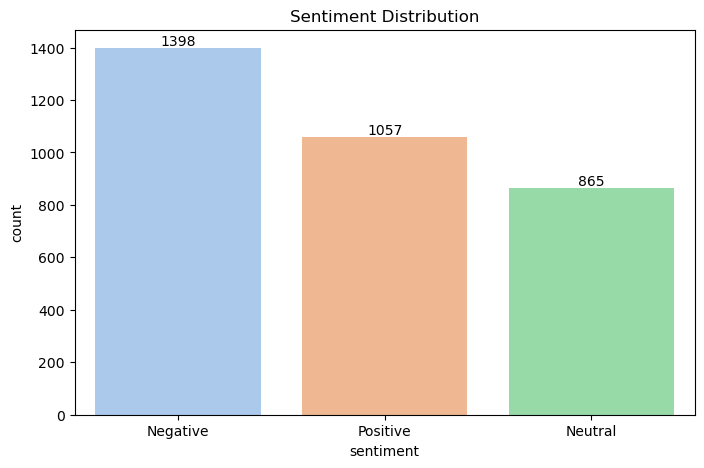

In [13]:
# Create canvas
plt.figure(figsize=(8, 5))
        
# Countplot
sns.countplot(x=df_eda.sentiment, palette='pastel')

# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       fontsize=10, color='black', 
                       xytext=(0, 5), 
                       textcoords='offset points')

plt.title('Sentiment Distribution')
plt.show()


Berdasarkan grafik ini, dapat diketahui bahwa dalam kolom `sentiment` terdapat 3 label diantaranya adalah Negative, Positive, dan Neutral. Kategori sentimen dengan jumlah tertinggi ialah Negative. Hal ini menandakan bahwa komentar netizen pada platform YouTube terkait dengan produk smartphone yang ada dalam dataset ini cenderung negatif daripada positif atau netral. Dari grafik tersebut juga dapat dilihat bahwa ada kecenderungan imbalance meskipun perbedaan yang nampak tidak terlalu jauh. Imbalance ini akan dilakukan penanganan pada Feature Engineering atau preprocessing data sebelum dilakukan modeling.

#### v.b.2. Comments Distribution

Sebelum menganalisis sentimen komentar, kita perlu memahami beberapa metrik dasar dari komentar, seperti jumlah kata, kalimat, stop words, panjang rata-rata kata, jumlah karakter, dan tanda baca. Analisis distribusi komentar ini akan memberikan gambaran tentang kompleksitas dan variasi dalam komentar. Hal ini penting untuk interpretasi lebih lanjut dan pemahaman pola komentar pengguna.

In [14]:
# Stopwords in indonesian
stop_words_id = set(stopwords.words('indonesian'))
print(stop_words_id)


{'yang', 'bung', 'bukannya', 'awal', 'menuturkan', 'bagian', 'kamu', 'menyampaikan', 'berapakah', 'rupanya', 'nah', 'punya', 'segera', 'terjadinya', 'sendirinya', 'tetap', 'umumnya', 'sepantasnyalah', 'memulai', 'sebut', 'kapan', 'sebuah', 'atas', 'sehingga', 'selalu', 'sedemikian', 'tetapi', 'masalahnya', 'toh', 'berakhirlah', 'ujarnya', 'jelasnya', 'tandas', 'diucapkan', 'antar', 'menanyai', 'terasa', 'pertanyakan', 'dikatakan', 'itukah', 'maka', 'seberapa', 'jadilah', 'seringnya', 'sama', 'masalah', 'kapankah', 'berikan', 'mengungkapkan', 'sebenarnya', 'diingatkan', 'mau', 'hal', 'sekitarnya', 'tersebutlah', 'sekurangnya', 'diberikannya', 'mendatangkan', 'tuturnya', 'ditunjuki', 'tampak', 'mengakhiri', 'setiba', 'tidak', 'disebut', 'sampai-sampai', 'sesudahnya', 'asalkan', 'berkehendak', 'berlebihan', 'jika', 'jelaslah', 'menanya', 'dibuat', 'setiap', 'bukankah', 'apaan', 'apatah', 'betul', 'diminta', 'waktu', 'pentingnya', 'masih', 'daripada', 'memihak', 'juga', 'walaupun', 'diperk

In [15]:
# word_count
df_eda['word_count'] = df_eda['comment'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# sentence_count
df_eda['sentence_count'] = df_eda['comment'].apply(lambda x: len(sent_tokenize(x)) if pd.notnull(x) else 0)

# stop_word_count
df_eda['stop_word_count'] = df_eda['comment'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words_id]))

# char_count
df_eda['char_count'] = df_eda['comment'].apply(lambda x: len(str(x)))

# mean_word_length
df_eda['mean_word_length'] = df_eda['comment'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# punctuation_count
df_eda['punctuation_count'] = df_eda['comment'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))


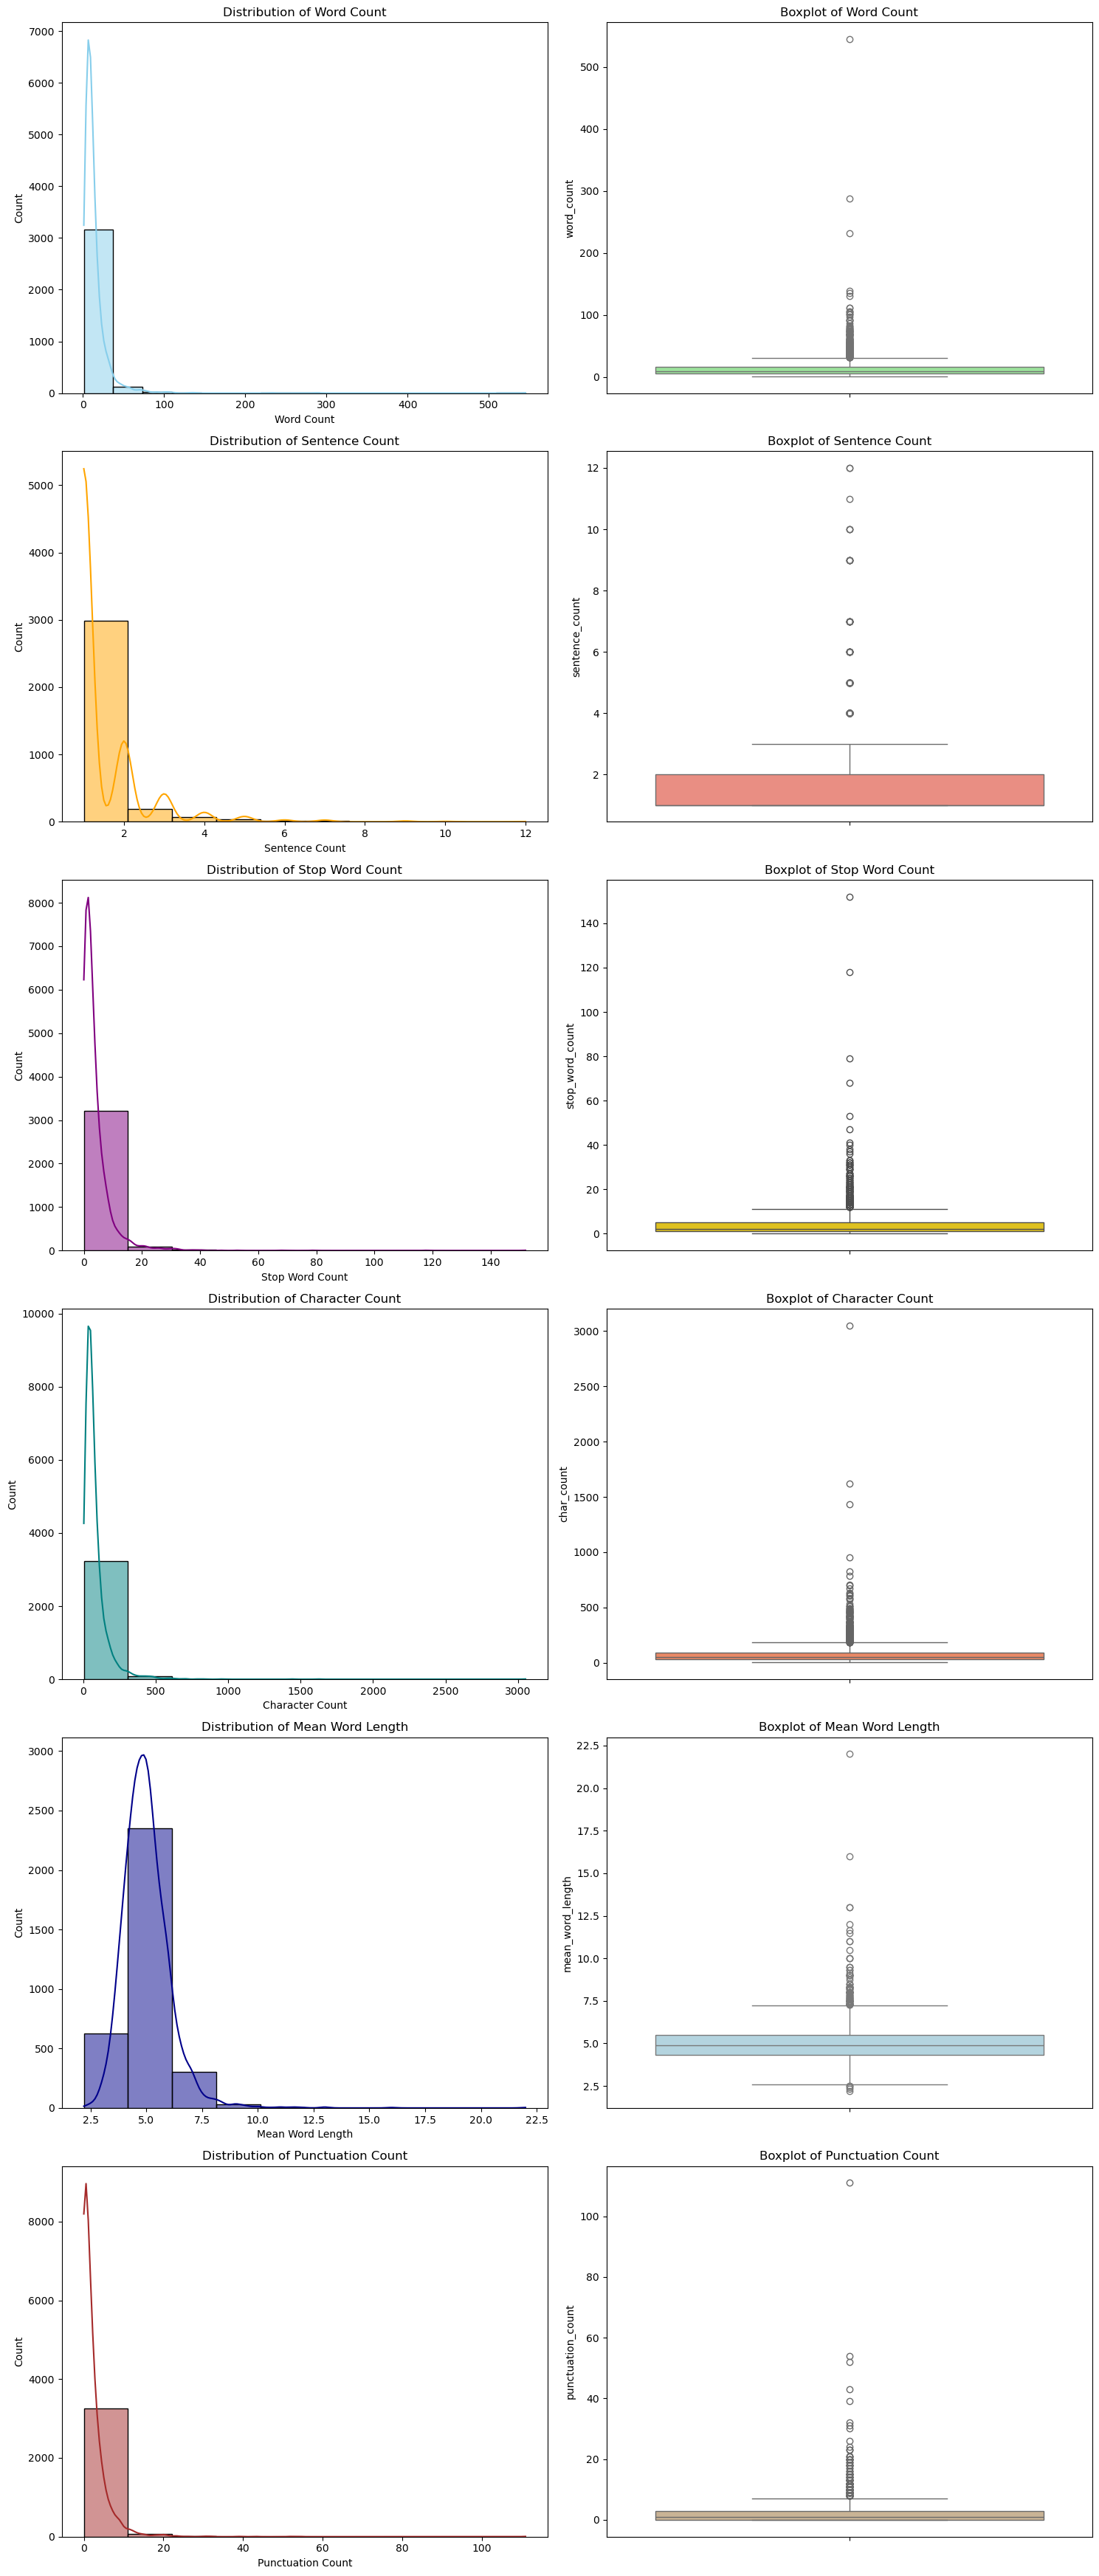

In [16]:
# Create canvas
plt.figure(figsize=(15, 35))

# Plot histogram for word_count
plt.subplot(6, 2, 1)
sns.histplot(df_eda['word_count'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')

# Plot boxplot for word_count
plt.subplot(6, 2, 2)
sns.boxplot(y=df_eda['word_count'], color='lightgreen')
plt.title('Boxplot of Word Count')

# Plot histogram for sentence_count
plt.subplot(6, 2, 3)
sns.histplot(df_eda['sentence_count'], kde=True, bins=10, color='orange')
plt.title('Distribution of Sentence Count')
plt.xlabel('Sentence Count')

# Plot boxplot for sentence_count
plt.subplot(6, 2, 4)
sns.boxplot(y=df_eda['sentence_count'], color='salmon')
plt.title('Boxplot of Sentence Count')

# Plot histogram for stop_word_count
plt.subplot(6, 2, 5)
sns.histplot(df_eda['stop_word_count'], kde=True, bins=10, color='purple')
plt.title('Distribution of Stop Word Count')
plt.xlabel('Stop Word Count')

# Plot boxplot for stop_word_count
plt.subplot(6, 2, 6)
sns.boxplot(y=df_eda['stop_word_count'], color='gold')
plt.title('Boxplot of Stop Word Count')

# Plot histogram for char_count
plt.subplot(6, 2, 7)
sns.histplot(df_eda['char_count'], kde=True, bins=10, color='teal')
plt.title('Distribution of Character Count')
plt.xlabel('Character Count')

# Plot boxplot for char_count
plt.subplot(6, 2, 8)
sns.boxplot(y=df_eda['char_count'], color='coral')
plt.title('Boxplot of Character Count')

# Plot histogram for mean_word_length
plt.subplot(6, 2, 9)
sns.histplot(df_eda['mean_word_length'], kde=True, bins=10, color='darkblue')
plt.title('Distribution of Mean Word Length')
plt.xlabel('Mean Word Length')

# Plot boxplot for mean_word_length
plt.subplot(6, 2, 10)
sns.boxplot(y=df_eda['mean_word_length'], color='lightblue')
plt.title('Boxplot of Mean Word Length')

# Plot histogram for punctuation_count
plt.subplot(6, 2, 11)
sns.histplot(df_eda['punctuation_count'], kde=True, bins=10, color='brown')
plt.title('Distribution of Punctuation Count')
plt.xlabel('Punctuation Count')

# Plot boxplot for punctuation_count
plt.subplot(6, 2, 12)
sns.boxplot(y=df_eda['punctuation_count'], color='tan')
plt.title('Boxplot of Punctuation Count')

# Adjust layout and show
plt.tight_layout()
plt.show()


Secara visual, dari seluruh grafik ini dapat diketahui sebagai berikut.

1. **Word Count**  
    - Sebagian besar teks memiliki jumlah kata yang relatif sedikit yang ditandai dengan puncak distribusi berada di sekitar rentang 0-100.
    - Terdapat banyak outlier yang menandakan ada sebagian komentar yang sangat panjang.
2. **Sentence Count**  
    - Sebagian besar teks memiliki jumlah kalimat yang sedikit yang ditandai dengan puncak distribusi berada di sekitar rentang 2-3 kalimat.
    - Terdapat banyak outlier yang menandakan ada sebagian komentar yang sangat panjang. 
3. **Stop Word Count**  
    - Sebagian besar teks memiliki jumlah kata stop word yang sedikit yang ditandai dengan puncak distribusi berada di sekitar rentang 0-20 kata stop word. Hal ini menunjukkan bahwa banyak teks dalam dataset yang cenderung memiliki sedikit kata-kata tidak memiliki makna substansial (seperti "dan", "atau", "yang", dll.).
    - Terdapat banyak outlier yang menandakan ada sebagian komentar yang sangat panjang dan mengandung banyak kata stop word.  
4. **Character Count**   
    - Sebagian besar teks memiliki jumlah karakter yang sedikit yang ditandai dengan puncak distribusi berada di sekitar rentang 0-500 karakter.
    - Terdapat banyak outlier yang menandakan ada sebagian komentar yang sangat panjang.    
5. **Mean Word Length**  
    - Sebagian besar teks memiliki panjang kata rata-rata yang relatif pendek yang ditandai dengan puncak distribusi berada di sekitar rentang 5-7 karakter. Hal ini menunjukkan bahwa banyak kata dalam dataset cenderung pendek.
    - Terdapat banyak outlier yang menandakan ada sebagian komentar yang memiliki kata-kata dengan panjang rata-rata yang jauh lebih panjang dari rata-rata keseluruhan.
6. **Punctiation Count**  
    - Sebagian besar teks memiliki jumlah tanda baca yang sedikit yang ditandai dengan puncak distribusi berada di sekitar rentang 0-20 tanda baca.
    - Terdapat banyak outlier yang menandakan ada sebagian komentar yang sangat panjang dan mengandung tanda baca.        

#### v.b.3. Word Frequency Analysis

Pada bagian ini akan dilakukan analisa terhadap kata-kata yang paling sering muncul dalam komentar. Analisis frekuensi kata ini akan mengungkapkan kata-kata dominan dalam dataset untuk membantu dalam mengenali tema yang sering dibahas oleh pengguna. Berikut adalah analisa untuk kata tunggal.

In [17]:
# CountVectorizer for unigram
stop_words_as_list = list(stop_words_id)
vectorizer = CountVectorizer(stop_words=stop_words_as_list, ngram_range=(1, 1))  # Unigrams
X = vectorizer.fit_transform(df_eda['comment'])
unigram_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_uni = unigram_freq.sum(axis=0).sort_values(ascending=False)

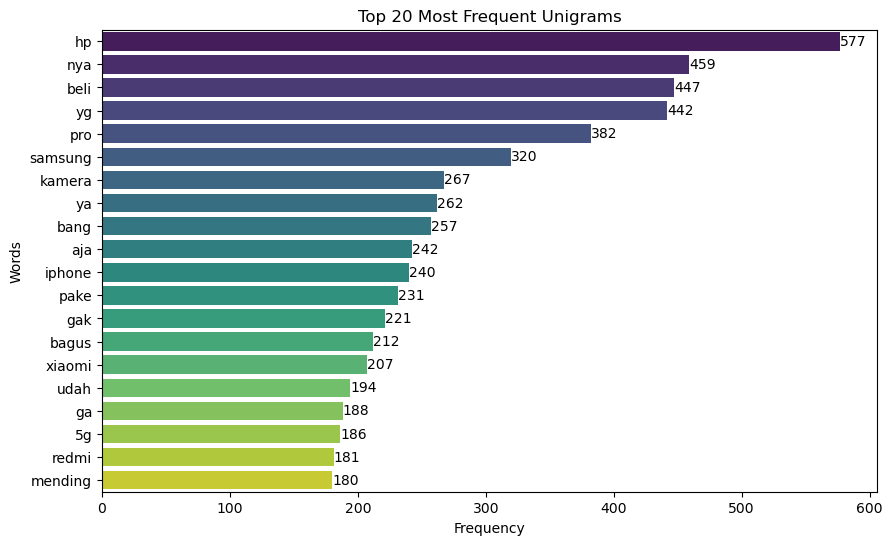

In [18]:
# Plot top 20 most frequent words
top_words = word_freq_uni.head(20)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')

for index, value in enumerate(top_words.values):
    plt.text(value, index, str(value), va='center')

plt.title('Top 20 Most Frequent Unigrams')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


Dapat terlihat bahwa 20 kata yang sering muncul dalam komentar adalah seperti pada output diatas. Selanjutnya kita akan melihat bagaimana hasil untuk pasangan dua kata.

In [19]:
# CountVectorizer for bigram
vectorizer = CountVectorizer(stop_words=stop_words_as_list, ngram_range=(2, 2))  # Bigram
X = vectorizer.fit_transform(df_eda['comment'])
bigram_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_bi = bigram_freq.sum(axis=0).sort_values(ascending=False)


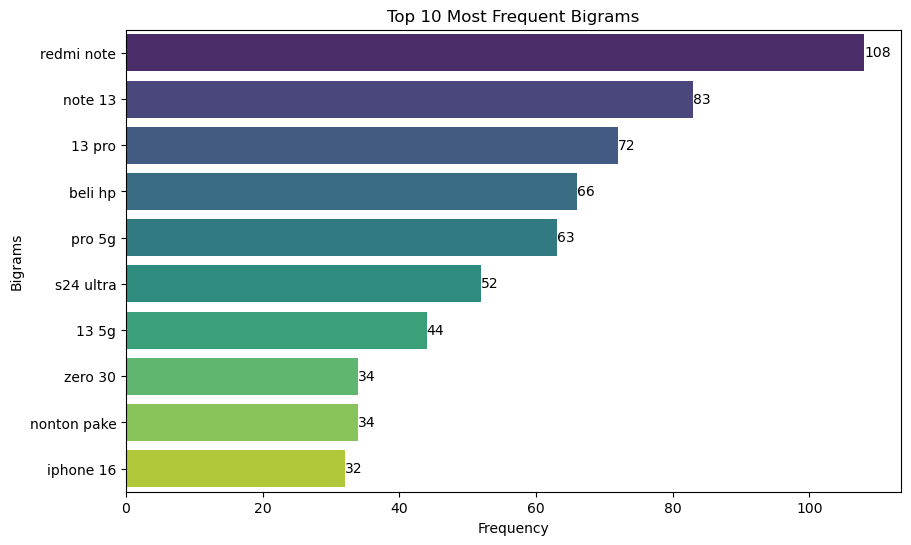

In [20]:
# Plot top 10 most frequent Bigram
plt.figure(figsize=(10, 6))

top_bigrams = word_freq_bi.head(10)

barplot = sns.barplot(x=top_bigrams.values, y=top_bigrams.index, palette='viridis')

for index, value in enumerate(top_bigrams.values):
    plt.text(value, index, str(value), va='center')  # Teks frekuensi di tengah batang

plt.title('Top 10 Most Frequent Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()


Dari grafik ini, kita dapat menarik beberapa kesimpulan:
- Berdasarkan bigram yang paling sering muncul, seperti "redmi note", "note 13", "s24 ultra", dan "iphone 16", dapat disimpulkan bahwa teks-teks dalam kumpulan data ini banyak membahas tentang produk smartphone. Hal ini berarti smartphone menjadi topik utama dalam dataset.
- Bigram seperti "beli hp" menunjukkan bahwa banyak pengguna yang sedang mencari informasi atau membandingkan produk untuk membeli ponsel baru.
- Kombinasi seperti "pro 5g" dan "13 5g" mengindikasikan bahwa fitur 5G merupakan salah satu spesifikasi yang banyak dicari oleh konsumen.
- Merek seperti Redmi, Samsung (S24), dan iPhone mendominasi komentar. Hal ini menunjukkan bahwa merek-merek tersebut memiliki popularitas yang tinggi di kalangan konsumen.
- danya bigram seperti "note 13" dan "13 pro" menunjukkan bahwa konsumen sering membandingkan berbagai model dari merek yang sama.
- Penggunaan kata "nonton pake" menunjukkan bahwa teks-teks ini mungkin berasal dari percakapan sehari-hari yang bersifat informal.

#### v.b.4. Wordcloud

Pada bagian ini, kita akan memanfaatkan word cloud untuk mengidentifikasi kata-kata yang paling dominan dalam komentar. Ini akan memberikan gambaran visual yang jelas mengenai topik atau tema yang sering dibahas oleh pengguna. Dengan menggunakan word cloud, kita dapat dengan mudah melihat kata-kata yang menonjol dan lebih memahami fokus utama dalam komentar yang terkandung dalam dataset.

##### All Comments

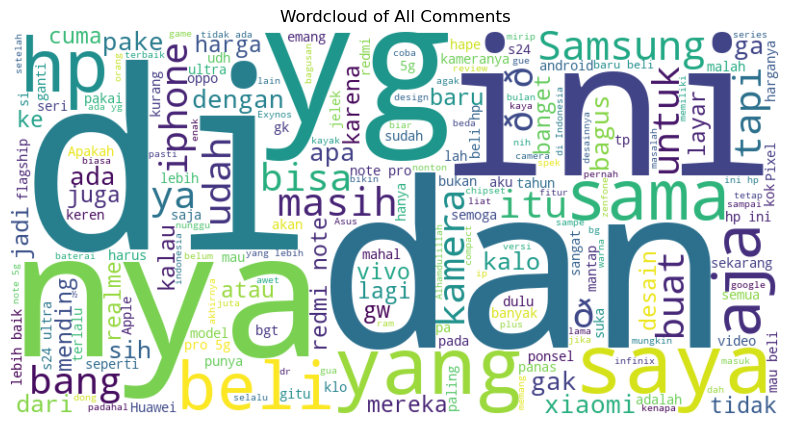

In [21]:
# Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(df_eda['comment']))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of All Comments")
plt.show()


Dari wordcloud tersebut, dapat disimpulkan beberapa hal sebagai berikut.

- Berdasarkan kata-kata yang paling sering muncul seperti "hp", "beli", "samsung", "xiaomi", "kamera", dan "harga", dapat disimpulkan bahwa topik utama dari komentar-komentar ini adalah smartphone.
- Merek seperti Samsung, Xiaomi, Oppo, dan Realme sering disebutkan, menunjukkan bahwa merek-merek ini cukup populer dan menjadi topik pembicaraan.
- Kata-kata seperti "kamera", "layar", "baterai", dan "desain" menunjukkan bahwa konsumen sangat memperhatikan fitur-fitur tersebut ketika memilih ponsel.
- Meskipun wordcloud tidak secara eksplisit menunjukkan sentimen positif atau negatif, namun kata-kata seperti "bagus", "keren", dan "mantap" mengindikasikan adanya sentimen positif terhadap produk-produk yang dibahas. Sebaliknya, kata-kata seperti "jelek", "kurang", dan "masalah" bisa mengindikasikan adanya sentimen negatif.
- Adanya banyak perbandingan antara merek dan model ponsel yang berbeda, seperti "samsung vs xiaomi", "note vs pro", dan sebagainya. Hal ini menunjukkan bahwa konsumen sering melakukan riset sebelum membeli ponsel.

Selanjutnya kita akan melihat bagaimana wordcloud untuk masing-masing kategori atau label sentimen.

##### Each Sentiment Category

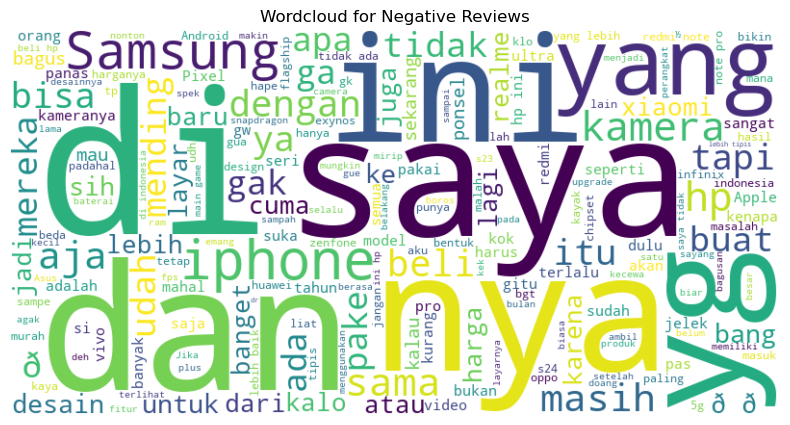

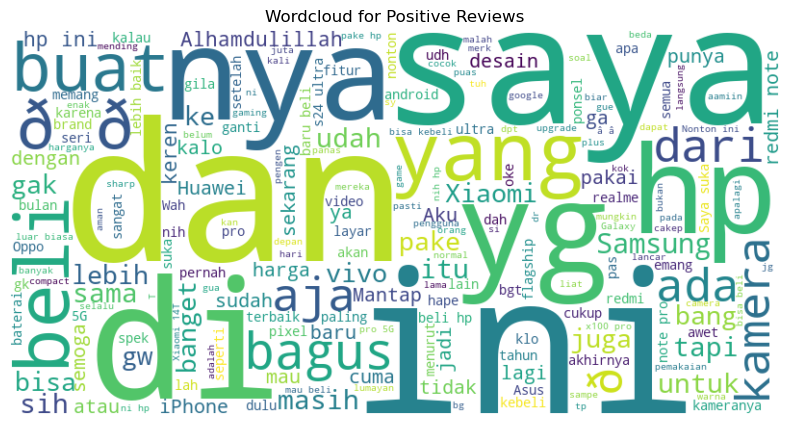

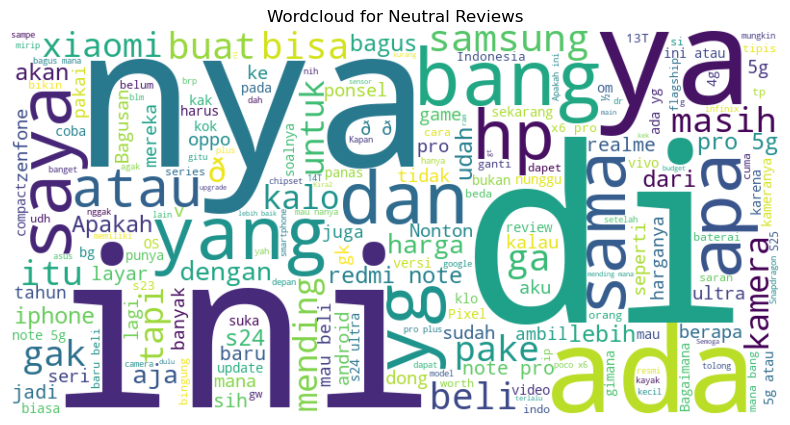

No comments available for sentiment: nan


In [22]:
# Function to generate a wordcloud
def generate_wordcloud(data, sentiment):
    # Ambil komentar untuk sentimen tertentu
    sentiment_data = data[data['sentiment'] == sentiment]['comment'].dropna()

    # Periksa apakah ada komentar untuk sentimen ini
    if len(sentiment_data) == 0:
        print(f"No comments available for sentiment: {sentiment}")
        return  # Melewatkan jika tidak ada komentar

    # Gabungkan komentar menjadi satu string
    text_data = " ".join(sentiment_data)

    # Generate wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Wordcloud for {sentiment} Reviews")
    plt.show()

# Wordclouds per sentiment category
for sentiment in df_eda['sentiment'].unique():
    generate_wordcloud(df_eda, sentiment)


**Wordcloud for Negative Reviews**
- Kata-kata Negatif Dominan:  
    - Masalah, jelek, buruk, tidak bagus: Kata-kata ini secara langsung menunjukkan ketidakpuasan pengguna terhadap produk.
    - Kurang, tidak sesuai, tidak bisa: Kata-kata ini menunjukkan bahwa produk tidak memenuhi ekspektasi pengguna.
    - Mahal, harga: Ini menunjukkan bahwa pengguna merasa harga produk tidak sebanding dengan kualitas yang ditawarkan.
- Masalah yang Sering Ditemukan:
    - Kualitas: Kata-kata seperti "jelek", "buruk", "tidak bagus" seringkali dikaitkan dengan kualitas produk yang dianggap kurang baik. Ini bisa mencakup masalah pada kamera, layar, baterai, atau kinerja secara keseluruhan.
    - Fitur: Kata-kata seperti "kurang", "tidak sesuai", "tidak bisa" menunjukkan bahwa produk tidak memiliki fitur yang diharapkan pengguna.
    - Harga: Banyak pengguna merasa bahwa harga produk terlalu mahal dibandingkan dengan kualitas yang ditawarkan.
    - Perbandingan: Kata-kata seperti "lebih baik", "lebih bagus" menunjukkan bahwa pengguna membandingkan produk yang mereka gunakan dengan produk lain, dan merasa bahwa produk yang mereka miliki kurang unggul.
- Merek yang Sering Disebut:
    - Samsung, Xiaomi, Realme, Apple: Meskipun ini adalah ulasan negatif, merek-merek ini tetap sering disebutkan, yang menunjukkan bahwa mereka adalah merek yang populer namun juga memiliki kekurangan di mata sebagian pengguna.

**Wordcloud for Positive Reviews**
- Kata-kata Positif Dominan:
    - Bagus, keren, mantap: Kata-kata ini secara langsung menunjukkan kepuasan pengguna terhadap produk.
    - Suka, senang, puas: Kata-kata ini menunjukkan emosi positif pengguna terhadap produk.
    - Bagus, keren, mantap: Kata-kata ini secara langsung menunjukkan kepuasan pengguna terhadap produk.
- Aspek yang Disukai:
    - Kualitas: Kata-kata seperti "bagus", "keren", "mantap" seringkali dikaitkan dengan kualitas produk yang dianggap baik. Ini bisa mencakup kualitas kamera, layar, baterai, atau kinerja secara keseluruhan.
    - Fitur: Kata-kata seperti "fitur", "spesifikasi", "canggih" menunjukkan bahwa pengguna puas dengan fitur-fitur yang ditawarkan oleh produk.
    - Harga: Meskipun ada beberapa kata terkait harga, namun kata-kata seperti "worth it", "tidak nyesel" menunjukkan bahwa pengguna merasa harga produk sebanding dengan kualitas yang ditawarkan.
    - Desain: Kata-kata seperti "desain", "keren", "elegan" menunjukkan bahwa pengguna menyukai desain produk.
- Merek yang Sering Disebut:
    - Samsung, Xiaomi, Realme, Apple: Sama seperti pada ulasan negatif, merek-merek ini juga sering disebutkan dalam ulasan positif, menunjukkan bahwa merek-merek ini memiliki basis penggemar yang kuat.

**Wordcloud for Neutral Reviews**
- Kata-kata Kunci :
    - Perbandingan: Kata-kata seperti "banding", "atau", "sama" menunjukkan bahwa pengguna sering membandingkan berbagai merek atau model ponsel.
    - Pertanyaan: Kata-kata seperti "apakah", "berapa", "bagaimana" menunjukkan bahwa pengguna masih mencari informasi atau memiliki keraguan.
    - Fitur: Kata-kamera, layar, baterai, 5G, dan spesifikasi lainnya menunjukkan bahwa pengguna memperhatikan fitur-fitur teknis ponsel.
    - Harga: Kata-kata seperti "harga", "mahal", "murah" menunjukkan bahwa harga adalah salah satu pertimbangan utama dalam memilih ponsel.
    - Keraguan: Kata-kata seperti "mungkin", "belum tentu", "bisa jadi" menunjukkan adanya keraguan atau ketidakpastian dalam keputusan pembelian.
- Merek yang Sering Disebut: 
    - Kemunculan merek-merek seperti Xiaomi, Samsung, Redmi, dan iPhone menunjukkan bahwa merek-merek ini adalah yang paling sering dibandingkan.

#### v.b.5. Unique Words Identification

Pada bagian ini, kita akan mengidentifikasi kata-kata unik yang hanya muncul sekali dalam komentar.

In [23]:
all_words = ' '.join(df_eda['comment']).split()
word_counts = Counter(all_words)
unique_words = [word for word, count in word_counts.items() if count == 1]
print(f"Unique words count: {len(unique_words)}")


Unique words count: 7146


Terlihat bahwa dalam dataset ini terdapat 7146 kata unik pada kolom `comment`.

## COMPLIMENTARY DATASET

Pada bagian ini akan ditampilkan bagaimana distribusi dari smartphone yang ada dalam dataset. Untuk yang pertama, kita akan melihat berapa banyak smartphone yang tersedia dalam dataset ini untuk 2024 dan 2025.

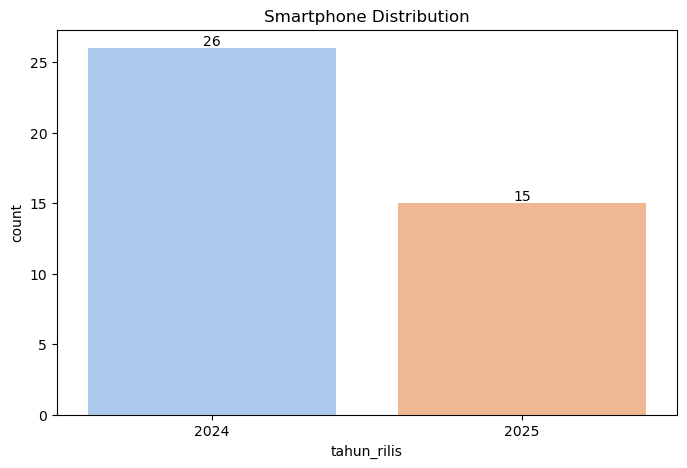

In [24]:
# Create canvas
plt.figure(figsize=(8, 5))
        
# Countplot
sns.countplot(x=df_spec.tahun_rilis, palette='pastel')

# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       fontsize=10, color='black', 
                       xytext=(0, 5), 
                       textcoords='offset points')

plt.title('Smartphone Distribution')
plt.show()


Terlihat bahwa untuk smartphone yang rilis pada 2024 yang terdapat pada dataset ini ada sebanyak 26 tipe dan untuk smartphone yang akan rilis di 2025 terdapat 15 tipe. Selanjutnya kita akan lebih spesifikkan lagi untuk melihat merek apa saja yang ada dalam dataset ini.

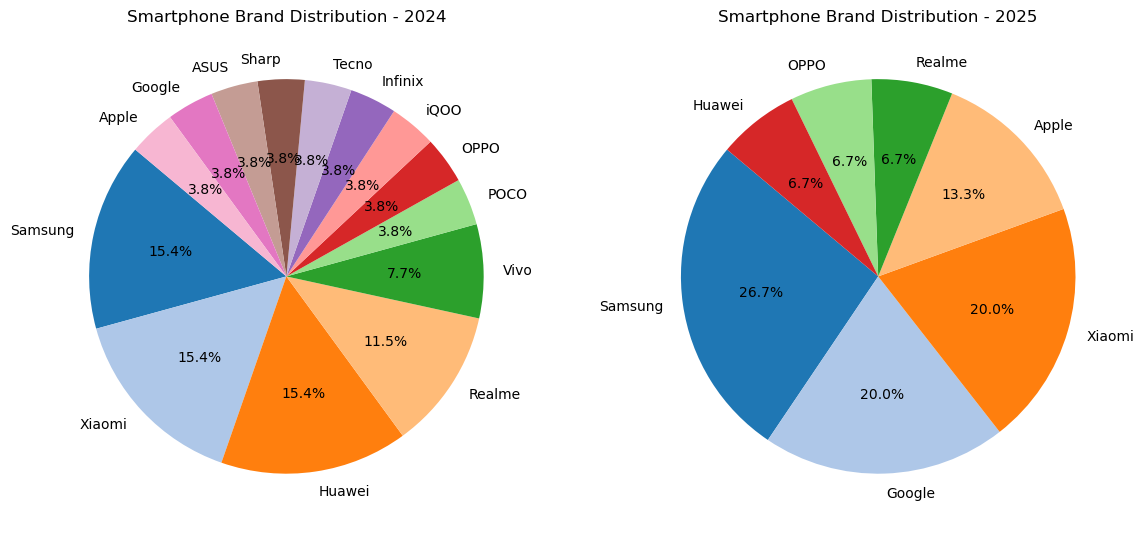

In [25]:
# Filter data berdasarkan tahun
data_2024 = df_spec[df_spec['tahun_rilis'] == 2024]
data_2025 = df_spec[df_spec['tahun_rilis'] == 2025] 

# Hitung distribusi merek
merek_counts_2024 = data_2024['merek'].value_counts()
merek_counts_2025 = data_2025['merek'].value_counts()

# Plot Pie Chart
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie Chart untuk 2024
axes[0].pie(merek_counts_2024, labels=merek_counts_2024.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
axes[0].set_title('Smartphone Brand Distribution - 2024')

# Pie Chart untuk 2025 (akan kosong jika tidak ada data)
if not merek_counts_2025.empty:
    axes[1].pie(merek_counts_2025, labels=merek_counts_2025.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    axes[1].set_title('Smartphone Brand Distribution - 2025')
else:
    axes[1].text(0.5, 0.5, 'No Data for 2025', horizontalalignment='center', verticalalignment='center', fontsize=14)
    axes[1].set_title('Smartphone Brand Distribution - 2025')
    axes[1].axis('off')

plt.show()

Terlihat bahwa merek smartphone yang tersedia dalam dataset adalah seperti Samsung, Xiaomi, Huawei, dan lainnya yang dapat dilihat dalam grafik tersebut.

Selanjutnya kita akan lihat bagaimana rentang harga untuk setiap segmen.

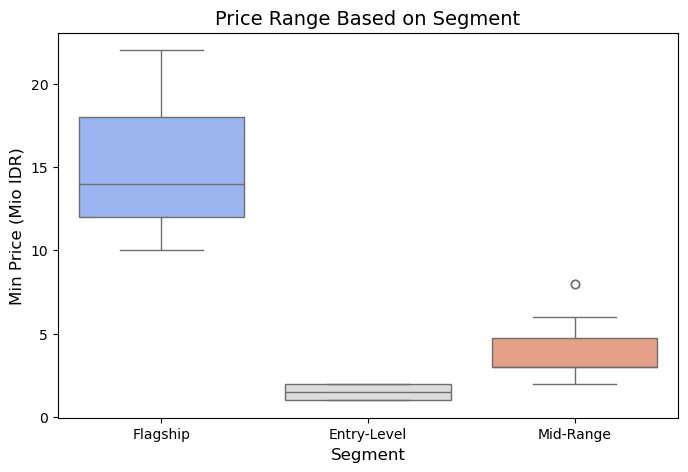

In [26]:
# Tambahkan kolom range harga numerik
df_spec['harga_min'] = df_spec['range_harga'].str.extract(r'Rp (\d+)', expand=False).astype(float)

# Visualisasi boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_spec, x="segmen", y="harga_min", palette="coolwarm")
plt.title("Price Range Based on Segment", fontsize=14)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Min Price (Mio IDR)", fontsize=12)
plt.show()


Dalam data yang digunakan dalam pembuatan model, kita memiliki beberapa jenis tipe smartphone dengan range harga sebagai berikut.

- Flagship: Ponsel flagship memiliki rentang harga yang cukup tinggi, dengan harga minimum umumnya di atas 10 juta Rupiah. Ini menunjukkan bahwa ponsel flagship umumnya diposisikan sebagai produk premium dengan fitur-fitur canggih dan teknologi terbaru.
- Entry-Level: Sebaliknya, ponsel entry-level memiliki harga minimum yang jauh lebih rendah, bahkan di bawah 2 juta Rupiah. 
- Mid-Range: Ponsel mid-range memiliki posisi di antara keduanya. Harga minimumnya umumnya berada di kisaran 5-10 juta Rupiah. 

-------------------

# v. Feature Engineering

## Text Preprocessing

Berdasarkan EDA yang telah dilakukan, terdapat beberapa tindakan yang dapat dilakukan untuk membersihkan teks sehingga dapat meningkatkan performa dalam **Modeling**, yaitu
- *Case folding*: membuat semua kata dalam kondisi *lower* agar mudah di analisis. Jika terdapat perbedaan *Case folding* dana kata tersebut sama, maka akan dianggap 2 kata yang berbeda oleh mesin.
- *Mention removal*: menghapus simbol @ yang biasa digunakan dalam memanggil suatu akun.
- *Hashtags removal*: menghapus # yang biasa digunakan sebagai keyword dalam suatu narasi kalimat.
- *Newline removal (\n)*: menghapus kondisi baris yang terdapat *Newline* yang mengakibatkan mesin tidak dapat bekerja secara efisien dalam menganalisis.
- *Whitespace removal*: menghapus suatu baris yang memiliki *space* yang besar.
- *URL removal*: menghapus suatu baris yang yang mencantumkan link website.
- *Non-letter removal*: menghapus karakter yang berupa simbol seperti yang tadi sempat muncul secara jelas ketika EDA.
- *replace slang*: mengganti istilah kata gaul dan singkatan menjadi kata dasar. 
- *Stopwords removal*: menghapus kata sifat dan subjek yang tidak dibutuhkan dalam teks sehingga meningkatkan performa ketika *modeling*.
- *Lemmatizing*: mengubah kata kerja berimbuhan ke dalam bentuk dasar.

In [27]:
# mengganti istilah gaul dan singkatan kata
slang_dict = {
    "gw": "saya", "mau": "ingin", "ni": "ini", "aja": "saja", "gak": "tidak", "bgt": "sangat",
    "klo": "kalau", "bgs": "bagus", "masi": "masih", "msh": "masih", "lom": "belum",
    "blm": "belum", "ap": "apa", "brg": "barang", "ad": "ada", "blom": "belum",
    "kebli": "kebeli", "tp": "tapi", "org": "orang", "tdk": "tidak", "yg": "yang",
    "kalo": "kalau", "sy": "saya", "bng": "abang", "bg": "abang", "fto": "foto",
    "spek": "spesifikasi", "cm": "cuma", "jg": "juga", "pd": "pada", "skrg": "sekarang",
    "ga": "tidak", "gk": "tidak", "batre": "baterai", "gue": "saya", "dpt": "dapat",
    "kek": "seperti", "mna": "mana", "mnding": "mending", "mend": "mending",
    "dr": "dari", "sma": "sama", "drpada": "daripada"
}

# Stopwords (Adjusted)
stpwds_id = list(set(stopwords.words('indonesian')))
# Keep certain words that are important in sentiment
retain_words = ['baru', 'lama', 'sama', 'tapi', 'tidak', 'dari', 'belum', 'bagi', 'mau', 'masalah']
for word in retain_words:
    if word in stpwds_id:
        stpwds_id.remove(word)

# Create WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

def replace_slang(text, slang_dict):
    # Create a regex pattern from the slang dictionary keys
    slang_pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in slang_dict.keys()) + r')\b')
    
    # Replace slang words with their corresponding values
    return slang_pattern.sub(lambda x: slang_dict[x.group()], text)

In [28]:

# Create Sastrawi Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Custom dictionaries for exceptions
stemming_exceptions = {"terasa": "terasa", "sat": "cepat", "set": "cepat"}
informal_phrases = {"sat set sat set": "cepat", "ya mas": ""}

def text_preprocessing(text):
    # Case folding
    text = text.lower()

    # Mention, hashtag, and newline removal
    text = re.sub("@[A-Za-z0-9_]+|#[A-Za-z0-9_]+|\\n", " ", text)

    # Whitespace removal
    text = text.strip()

    # URL removal
    text = re.sub(r"http\S+|www.\S+", " ", text)

    # Non-letter and number removal
    text = re.sub(r"[^\w\s']+", " ", text)

    # Replace informal phrases
    for phrase, replacement in informal_phrases.items():
        text = text.replace(phrase, replacement)

    # Replace slang
    text = replace_slang(text, slang_dict)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stpwds_id]

    # Stemming with exception handling
    tokens = [
        stemming_exceptions[word] if word in stemming_exceptions else stemmer.stem(word)
        for word in tokens
    ]
    
    # Post-process to remove duplicates
    tokens = list(dict.fromkeys(tokens))

    # Combining tokens
    text = ' '.join(tokens)

    return text



In [29]:
# Applying Text Preprocessing to the Dataset

df['text_processed'] = df['comment'].apply(text_preprocessing)
df

,author,comment,sentiment,timestamp,like_count,tipe_produk,brand,segment,release_date,text_processed
0,@rinzia2346,"""batre 5000 mah kerasa kurang awet ga sih di h...",Negative,2024-10-23 05:11:29+00:00,0,Tecno Spark 20C,Tecno,Entry-Level,24-Jan,baterai 5000 mah rasa awet tidak sih hp 12nm e...
1,@LiriklaguKu-x8s,"Bang kok punya ku g ada fitur nfc nya, solusin...",Negative,2024-11-04 10:29:48+00:00,0,Tecno Spark 20C,Tecno,Entry-Level,24-Jan,bang ku g fitur nfc nya solusi dongssss
2,@encischannel9849,Gue juga pake tekno spark 20c tp ko g ada nfc ya,Negative,2024-09-11 15:30:53+00:00,0,Tecno Spark 20C,Tecno,Entry-Level,24-Jan,pake tekno spark 20c tapi ko g nfc ya
3,@WelderIjo,hp dont play pubg nih,Negative,2024-05-03 12:14:37+00:00,0,Tecno Spark 20C,Tecno,Entry-Level,24-Jan,hp dont play pubg nih
4,@edybaskorobaskoro9660,Frame dropnya kok keliatan parah gitu ? Jauh s...,Negative,2024-02-29 18:19:10+00:00,0,Tecno Spark 20C,Tecno,Entry-Level,24-Jan,frame drop liat parah gitu sama si zte vita 40
...,...,...,...,...,...,...,...,...,...,...
3317,@leotravel85,"Saya ingin baterai yang lebih besar, bukan pon...",Negative,2024-11-04 09:32:52+00:00,0,Galaxy S25 Slim,Samsung,Flagship,Mid-2025,baterai ponsel tipis bodoh
3318,@skeletor7708,Berikan saya Samsung Galaxy Ultra 6.1 inci den...,Positive,2024-11-04 09:16:53+00:00,0,Galaxy S25 Slim,Samsung,Flagship,Mid-2025,samsung galaxy ultra 6 1 inci spesifikasi hila...
3319,@Jz-fj5ki,Samsung BAWA PANEL LAYAR M14 UNTUK S25 ULTRA s...,Negative,2024-11-04 09:02:43+00:00,0,Galaxy S25 Slim,Samsung,Flagship,Mid-2025,samsung bawa panel layar m14 s25 ultra iphone ...
3320,@Jz-fj5ki,"Ponsel tipis adalah yang terburuk, selalu rent...",Negative,2024-11-04 08:58:32+00:00,0,Galaxy S25 Slim,Samsung,Flagship,Mid-2025,ponsel tipis buruk rentan keluh layar perangka...


In [30]:
df['text_processed'].apply(lambda x: len(x.split())).describe()

count    3322.000000
mean        8.466887
std         8.302923
min         0.000000
25%         4.000000
50%         6.000000
75%        10.000000
max       180.000000
Name: text_processed, dtype: float64

In [31]:
df['text_processed'] = df['text_processed'].apply(lambda x: x if len(x.split()) > 0 else None)
df = df.dropna(subset=['text_processed'])
df['text_processed'].apply(lambda x: len(x.split())).describe()

count    3300.000000
mean        8.523333
std         8.301627
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max       180.000000
Name: text_processed, dtype: float64

## Label Encoding

> Label encoding bertujuan untuk mengubah values ke bentuk diskrit sehingga memudahkan dalam *modeling*.

In [32]:
# Display Target

df['sentiment'].unique()

array(['Negative', 'Positive', 'Neutral', nan], dtype=object)

In [33]:
# Change Target into Number

df['target'] = df['sentiment'].replace({'Negative': 0, 'Positive': 1, 'Neutral': 2})


In [34]:
example_index = 42  # Choose a sample index
print("Original Text:", df['comment'].iloc[example_index])
print("Processed Text:", df['text_processed'].iloc[example_index])

Original Text: Baru beli buat hape ke 2. Tapi kenapa Helio G85 berasa lemot ya mas? Punya ibu saya Galaxy A22 Helio G80 berasa lebih sat set sat set. Sama sama 128gb. Yg A06 punya saya berasa patah patah dan ada loading klo buka aplikasi. Padahal aplikasi juga ga banyak cuma ada sosmed sama wa kantor kerjaan
Processed Text: baru beli hape 2 tapi hio g85 asa lot galaxy a22 g80 cepat sama 128gb a06 patah loading buka aplikasi tidak sosmed wa kantor kerja


## Missing Values

> Membersihkan *missing values* pada dataset bertujuan untuk mengoptimalkan *modeling* sehingga ketika dievaluasi menghasilkan nilai metrik yang tinggi. *Missing values* dilakukan setelah text preprocessing untuk menghindari timbulnya cell yang kosong atau duplikat setelah dilakukan pembersihan kata dalam teks.

In [35]:
# periksa missing values sebelum di handle
df.isnull().sum()

author            0
comment           0
sentiment         2
timestamp         0
like_count        0
tipe_produk       0
brand             0
segment           0
release_date      0
text_processed    0
target            2
dtype: int64

In [36]:
df.dropna(inplace=True)
df.isnull().sum()

author            0
comment           0
sentiment         0
timestamp         0
like_count        0
tipe_produk       0
brand             0
segment           0
release_date      0
text_processed    0
target            0
dtype: int64

## Data Splitting

> Data Splitting bertujuan memudahkan model ketika berlatih hingga diuji.

In [37]:
# Data Splitting
X_train_val, X_test, y_train_val, y_test = train_test_split(
    df.text_processed,
    df.target,
    test_size=0.15,
    random_state=20,
    stratify=df.target
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.10,
    random_state=20,
    stratify=y_train_val
)

print('Train Size :', X_train.shape)
print('Val Size   :', X_val.shape)
print('Test Size  :', X_test.shape)

# Check Missing Values
print("Missing values in Train:", X_train.isnull().sum())
print("Missing values in Val:", X_val.isnull().sum())
print("Missing values in Test:", X_test.isnull().sum())

Train Size : (2522,)
Val Size   : (281,)
Test Size  : (495,)
Missing values in Train: 0
Missing values in Val: 0
Missing values in Test: 0


## Balancing Data

> *Balancing* dilakukan agar dataset berada dikondisi yang proposional. *Balancing* dilakukan dengan metode *undersampling* bertujuan untuk menyeimbangkan berdasarkan jumlah kelas data paling sedikit.

In [38]:
# 1. Check class distribution
print("Original Class Distribution:")
print(y_train.value_counts())

Original Class Distribution:
target
0.0    1067
1.0     798
2.0     657
Name: count, dtype: int64


In [39]:
# 2. Identify the minimum class size
# min_count = y_train.value_counts().min()
train_data = pd.DataFrame({'text': X_train, 'target': y_train})
max_count = train_data['target'].value_counts().max()

In [40]:
# 3. Undersample majority classes
# train_data = pd.DataFrame({'text': X_train, 'target': y_train})

# undersampled_data = train_data.groupby('target').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

oversampled_data = train_data.groupby('target').apply(lambda x: x.sample(max_count, replace=True)).reset_index(drop=True)


In [41]:
# 6. Check the new class distribution after undersampling
print("Undersampled Class Distribution (Train):")
# print(undersampled_data['target'].value_counts())
print (oversampled_data['target'].value_counts())

# 7. View the final undersampled dataset
print("Final Undersampled Dataset (Train):")
# print(undersampled_data.head())
print (oversampled_data.head())

# 8. Prepare the undersampled training set for use
X_train_resampled = oversampled_data['text']
y_train_resampled = oversampled_data['target']

# Check the class distribution for the final resampled data
print("Resampled Train Distribution:")
print(y_train_resampled.value_counts())

Undersampled Class Distribution (Train):
target
0.0    1067
1.0    1067
2.0    1067
Name: count, dtype: int64
Final Undersampled Dataset (Train):
                                                text  target
0     design kamera nya tapi jelek bgttt banding 13t     0.0
1   please bikin video hp bro tidak taat atur negara     0.0
2                       setia mtk cross a7 andromeda     0.0
3  hp engga laku tapi ngeluhin isue layar shadow ...     0.0
4                          user infinix menang harga     0.0
Resampled Train Distribution:
target
0.0    1067
1.0    1067
2.0    1067
Name: count, dtype: int64


In [42]:
oversampled_data

,text,target
0,design kamera nya tapi jelek bgttt banding 13t,0.0
1,please bikin video hp bro tidak taat atur negara,0.0
2,setia mtk cross a7 andromeda,0.0
3,hp engga laku tapi ngeluhin isue layar shadow ...,0.0
4,user infinix menang harga,0.0
...,...,...
3196,udah dapet temper glass bawa,2.0
3197,kira2 iphone tidak,2.0
3198,mending realme c61 sama itel rs4,2.0
3199,baterai 6000 mah tingkat,2.0


In [43]:
# X_train_resampled, y_train_resampled = X_train_resampled[X_train_resampled.duplicated() == False], y_train_resampled[X_train_resampled.duplicated() == False]

# # Optionally, print the size of the data after removing duplicates
# print(f"Train size after removing duplicates: {X_train_resampled.shape[0]}")

In [44]:
# # periksa duplikasi setelah di handle
# X_train_resampled.duplicated().sum()

In [45]:
example_index = 42  # Choose an index from your dataset
original_text = X_train_resampled.iloc[example_index]
processed_text = X_train_resampled.iloc[example_index]
print("Original Text:")
print(original_text)
print("\nProcessed Text:")
print(processed_text)

Original Text:
daya pake v29 5g tapi jujur tidak suka lihat designnya x100 krna bulet blakang nya bngt jatuh elegan kyk lensa dslr coba model sama v27 mending kasih varian warna tantang biar mantap

Processed Text:
daya pake v29 5g tapi jujur tidak suka lihat designnya x100 krna bulet blakang nya bngt jatuh elegan kyk lensa dslr coba model sama v27 mending kasih varian warna tantang biar mantap


In [46]:
vectorizer = CountVectorizer(max_features=300)

X_train_vec = vectorizer.fit_transform(X_train_resampled).toarray()
X_val_vec = vectorizer.transform(X_val).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

print (X_train_vec.shape, X_val_vec.shape, X_test_vec.shape)

(3201, 300) (281, 300) (495, 300)


-------------------

# vi. Base Model

## Model Definition

In [47]:
tf.keras.backend.clear_session()

seed = 20
model = tf.keras.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(X_train_vec.shape[1],)))


model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model.add(tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model.add(tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model.add(tf.keras.layers.Dense(units=32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))

model.add(tf.keras.layers.Dense(units=3, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        77,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,387 (470.26 KB)

 Trainable params: 120,387 (470.26 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [48]:
print("X_train_vec shape:", X_train_vec.shape)
print("y_train shape:", y_train_resampled.shape)
print("X_val_vec shape:", X_val_vec.shape)
print("y_val shape:", y_val.shape)

X_train_vec shape: (3201, 300)
y_train shape: (3201,)
X_val_vec shape: (281, 300)
y_val shape: (281,)


In [49]:
history = model.fit(
    X_train_vec, y_train_resampled,
    epochs=30,
    batch_size=10,
    validation_data=(X_val_vec, y_val),
    verbose=1
)

Epoch 1/30
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4748 - loss: 1.0088 - val_accuracy: 0.5125 - val_loss: 1.0077
Epoch 2/30
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7777 - loss: 0.5670 - val_accuracy: 0.5374 - val_loss: 1.3306
Epoch 3/30
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8858 - loss: 0.2979 - val_accuracy: 0.5338 - val_loss: 1.6446
Epoch 4/30
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9149 - loss: 0.2101 - val_accuracy: 0.5231 - val_loss: 1.7115
Epoch 5/30
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9272 - loss: 0.1736 - val_accuracy: 0.5302 - val_loss: 2.1578
Epoch 6/30
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9317 - loss: 0.1465 - val_accuracy: 0.5409 - val_loss: 2.2395
Epoch 7/30
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9302 - loss: 0.1472 - val_accuracy: 0.5053 - val_loss: 2.4482
Epoch 8/30
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9388 - loss: 0.1395 - val_accuracy: 0.

## Model Evaluation

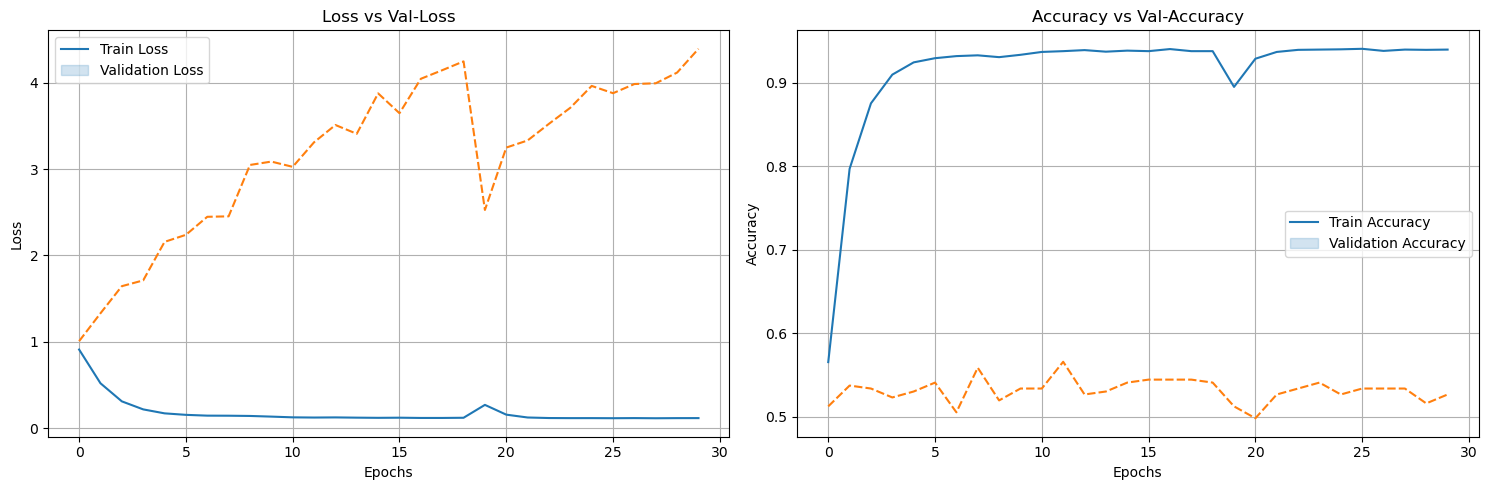

In [50]:
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))

# Plot Loss
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Val-Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid()

# Plot Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Val-Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.grid()

plt.tight_layout()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
ANN Training (Base)


,precision,recall,f1-score,support
0.0,0.581197,0.571429,0.576271,119.0
1.0,0.525253,0.584270,0.553191,89.0
2.0,0.430769,0.383562,0.405797,73.0
macro avg,0.512406,0.513087,0.511753,281.0
weighted avg,0.524399,0.526690,0.524674,281.0
accuracy,0.526690,NaN,NaN,NaN


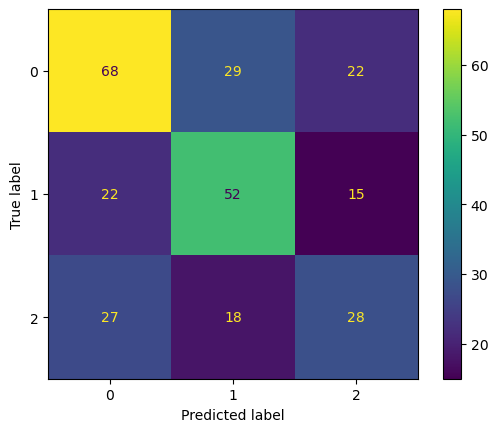

In [51]:
#making predictions
val_predictions = model.predict(X_val_vec)
val_predictions_classes = np.argmax(val_predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_val, val_predictions_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Classification Report as DataFrame
report_dict = classification_report(y_val, val_predictions_classes, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Add Validation Accuracy to the DataFrame
accuracy = accuracy_score(y_val, val_predictions_classes)
report_df = report_df.drop('accuracy', axis=0)
report_df.loc['accuracy'] = [accuracy, None, None, None]

# Display the report DataFrame
print("ANN Training (Base)")
display(report_df)

# vii. Model Improvement

## Model Definition

In [52]:
#Reshape data into 3D
X_train_reshaped = X_train_vec.reshape(X_train_vec.shape[0], 1, X_train_vec.shape[1])
X_val_reshaped = X_val_vec.reshape(X_val_vec.shape[0], 1, X_val_vec.shape[1])
X_test_reshaped = X_test_vec.reshape(X_test_vec.shape[0],1, X_test_vec.shape[1])    

In [53]:
print(X_train_vec.shape)

(3201, 300)


In [54]:
max_sequence_length = max([len(sequence) for sequence in X_train])
print(f"Maximum sequence length: {max_sequence_length}")

Maximum sequence length: 666


In [55]:
# Clear any existing session
tf.keras.backend.clear_session()

# Set the random seed for reproducibility
seed = 20

# Define the model
model_lstm = tf.keras.Sequential()

# Add Embedding layer
# Assuming you have a vocabulary size of 10000 and embedding dimension of 100
vocab_size = 10000  # Adjust vocab size
embedding_dim = 100  # Adjust embedding dimension
model_lstm.add(tf.keras.layers.Embedding(input_dim=vocab_size, 
                                         output_dim=embedding_dim, 
                                         input_length=300))  # Sequence length = 300

# Bidirectional LSTM Layer
model_lstm.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, return_sequences=False)))

# Dense Hidden Layers
model_lstm.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_lstm.add(tf.keras.layers.Dropout(0.3))
model_lstm.add(tf.keras.layers.Dense(units=64, activation='relu'))
model_lstm.add(tf.keras.layers.Dropout(0.3))

# Output Layer
model_lstm.add(tf.keras.layers.Dense(units=3, activation='softmax'))

# Force the model to build
model_lstm.build(input_shape=(None, 300))  # None for batch size

# Compile
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model_lstm.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 300, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,109,443 (4.23 MB)

 Trainable params: 1,109,443 (4.23 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [56]:
print("X_train_vec shape:", X_train_vec.shape)
print("y_train shape:", y_train.shape)
print("X_val_vec shape:", X_val_vec.shape)
print("y_val shape:", y_val.shape)

X_train_vec shape: (3201, 300)
y_train shape: (2522,)
X_val_vec shape: (281, 300)
y_val shape: (281,)


In [57]:
# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10,  # Stop after 5 epochs without improvement
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5,  # Reduce learning rate by half
    patience=5,  # Wait 2 epochs before reducing
    min_lr=1e-5  # Minimum learning rate
)

# Train the model
history_lstm = model_lstm.fit(
    X_train_vec,  # Training features
    y_train_resampled,      # Training labels
    validation_split=0.2,  # Use 20% of data for validation
    batch_size=10,         # Adjust batch size
    epochs=20,             # Set the maximum number of epochs
    callbacks=[early_stopping, reduce_lr],  # Add callbacks
    verbose=1              # Display progress during training
)


Epoch 1/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - accuracy: 0.4247 - loss: 1.0641 - val_accuracy: 0.0000e+00 - val_loss: 1.7171 - learning_rate: 1.0000e-04
Epoch 2/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.3984 - loss: 1.0321 - val_accuracy: 0.0000e+00 - val_loss: 1.7214 - learning_rate: 1.0000e-04
Epoch 3/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.4169 - loss: 1.0275 - val_accuracy: 0.0000e+00 - val_loss: 1.8007 - learning_rate: 1.0000e-04
Epoch 4/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.4308 - loss: 1.0316 - val_accuracy: 0.0000e+00 - val_loss: 1.7741 - learning_rate: 1.0000e-04
Epoch 5/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.4070 - loss: 1.0355 - val_accuracy: 0.0000e+00 - val_loss: 1.7465 - learning_rate: 1.0000e-04
Epoch 6/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - accuracy: 0.4097 - loss: 1.0253 - val_accuracy: 0.0000e+00 - val_loss: 1.7490 - learning_rate: 1.0000e-04
Epoch 7/20
256/256 ━━━━━━━━━

## Model Evaluation

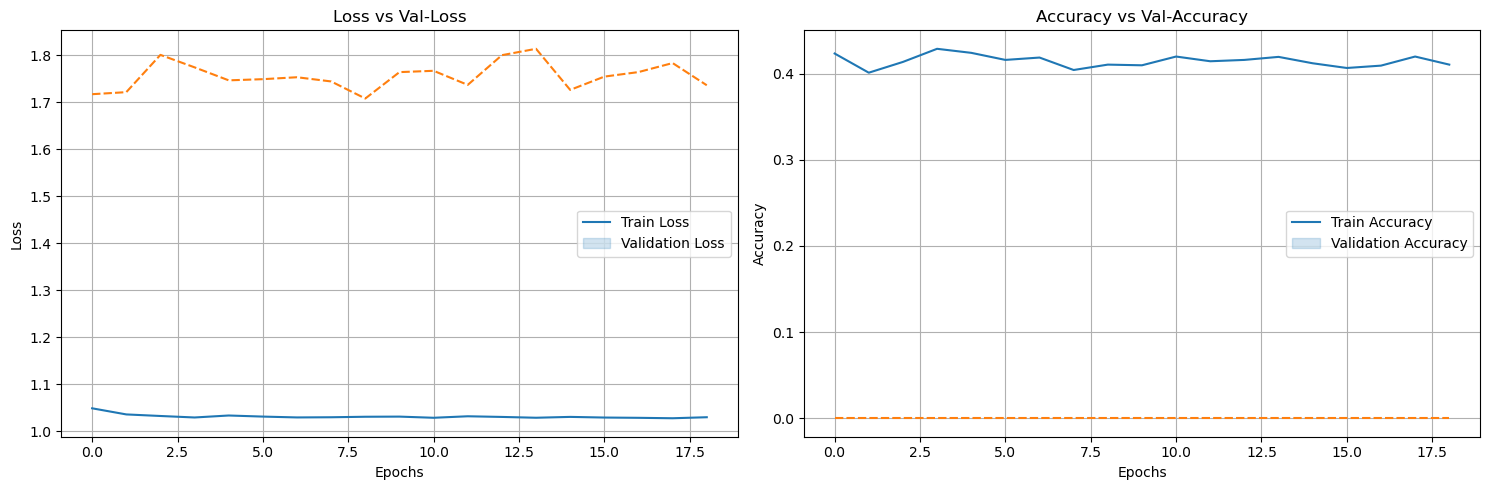

In [58]:
history_improved_df = pd.DataFrame(history_lstm.history)

plt.figure(figsize=(15, 5))

# Plot Loss
plt.subplot(1, 2, 1)
sns.lineplot(data=history_improved_df[['loss', 'val_loss']])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Val-Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid()

# Plot Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(data=history_improved_df[['accuracy', 'val_accuracy']])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Val-Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.grid()

plt.tight_layout()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
ANN Training (LSTM)


,precision,recall,f1-score,support
0.0,0.424000,0.890756,0.574526,119.0
1.0,0.290323,0.101124,0.150000,89.0
2.0,0.000000,0.000000,0.000000,73.0
macro avg,0.238108,0.330627,0.241509,281.0
weighted avg,0.271511,0.409253,0.290813,281.0
accuracy,0.409253,NaN,NaN,NaN


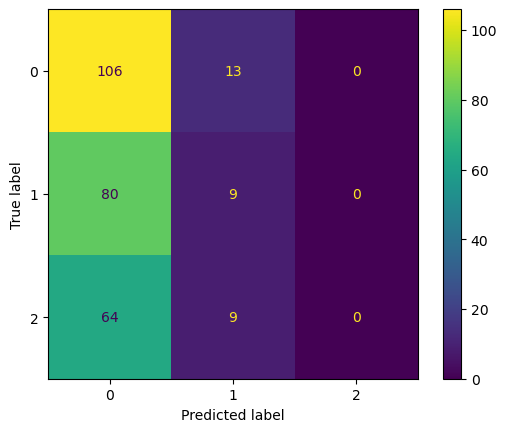

In [59]:
# Reshape the validation data to match the expected input shape
X_val_corrected = np.squeeze(X_val_reshaped)  # Remove the extra dimension

# Make predictions
val_predictions = model_lstm.predict(X_val_corrected)

# Convert probabilities to class labels
val_predictions_classes = np.argmax(val_predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_val, val_predictions_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Classification Report as DataFrame
report_improved_dict = classification_report(y_val, val_predictions_classes, output_dict=True)
report_improved_df = pd.DataFrame(report_improved_dict).transpose()

# Add Validation Accuracy to the DataFrame
accuracy = accuracy_score(y_val, val_predictions_classes)
report_improved_df = report_improved_df.drop('accuracy', axis=0)
report_improved_df.loc['accuracy'] = [accuracy, None, None, None]

# Display the report DataFrame
print("ANN Training (LSTM)")
display(report_improved_df)


-------------------

# ix. Model Saving

In [60]:
""" #save into file
with open('model.pkl', 'wb') as file_1:
    pickle.dump (model, file_1)
with open('model_scaler.pkl', 'wb') as file_2:
    pickle.dump (scaler, file_2)
with open('model_encoder.pkl', 'wb') as file_3:
    pickle.dump (encoder, file_3)
with open('num_col.txt', 'w') as file_4:
    json.dump (num_col, file_4)
with open('cat_col.txt', 'w') as file_5:
    json.dump (cat_col, file_5)
with open('area_mapping.json', 'w') as file_6:
    json.dump(area_freq, file_6) """

" #save into file\nwith open('model.pkl', 'wb') as file_1:\n    pickle.dump (model, file_1)\nwith open('model_scaler.pkl', 'wb') as file_2:\n    pickle.dump (scaler, file_2)\nwith open('model_encoder.pkl', 'wb') as file_3:\n    pickle.dump (encoder, file_3)\nwith open('num_col.txt', 'w') as file_4:\n    json.dump (num_col, file_4)\nwith open('cat_col.txt', 'w') as file_5:\n    json.dump (cat_col, file_5)\nwith open('area_mapping.json', 'w') as file_6:\n    json.dump(area_freq, file_6) "

-------------------

# x. Model Inference

-------------------

# xi. Kesimpulan

**Rekomendasi langkah selanjutnya**

-------------------